<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [5]:
data.to_csv('Mod 10 FINAL Descriptive-data.csv')

In [4]:
data.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


In [5]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [7]:
X.to_csv('Mod 10 FINAL Numeric-data.csv')

In [6]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


# Principal Component Analysis  (for Evaluation skip this part)

This is a self-created section to practice and understand a bit better the data set through a Principal Component Analisys, you may skip this part alltogheter.

#### #1 Standardized the Data for PCA

In [72]:
from sklearn.preprocessing import StandardScaler

#  X is original DataFrame
scaler = StandardScaler()
PCA_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display the first few rows to verify
PCA_df.head()


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,-1.712912,-1.948145e-16,-0.653913,-1.575895,-0.97344,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
1,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.97344,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
2,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.97344,-0.106,-0.106,-0.654654,-0.106,1.812654,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
3,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.97344,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
4,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.97344,-0.106,-0.106,1.527525,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091


#### #2 Review number of components to plot: 

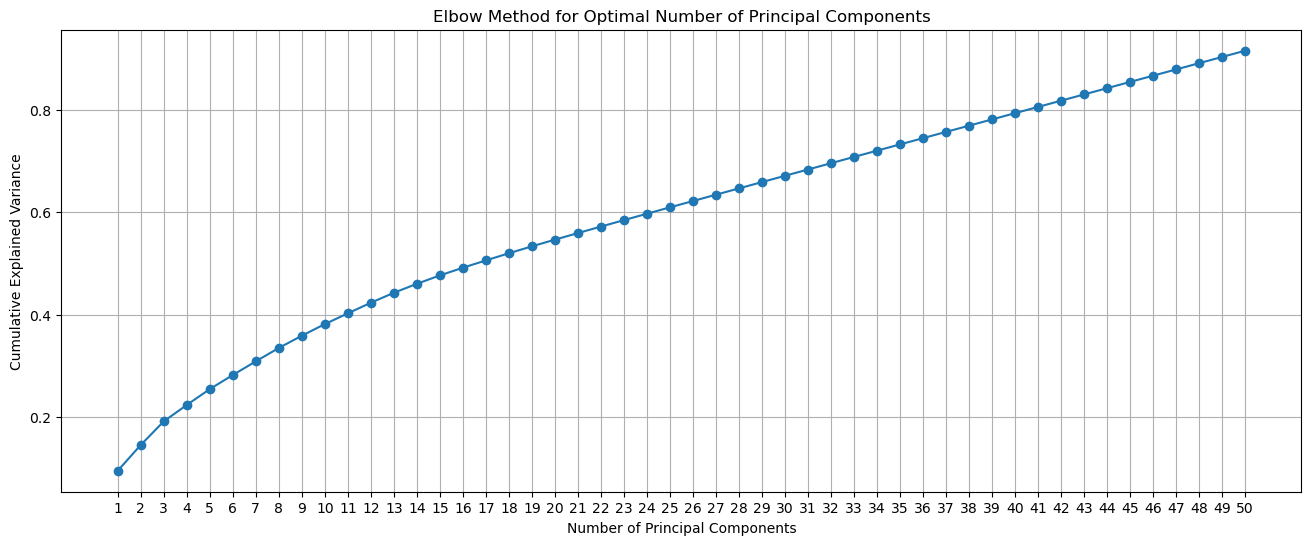

In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Initialize lists to capture explained variance for each number of components
explained_variances = []

# Step 2: Loop through possible number of components (e.g., 1 to min(number of features, 10))
# This helps you find where adding additional components doesn't increase variance explained by much
for n_components in range(1, min(PCA_df.shape[1], 51)):
    pca = PCA(n_components=n_components)
    pca.fit(PCA_df)
    explained_variances.append(sum(pca.explained_variance_ratio_))

# Step 3: Plot the cumulative explained variance for each number of components
plt.figure(figsize=(16, 6))
plt.plot(range(1, min(PCA_df.shape[1], 51)), explained_variances, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Optimal Number of Principal Components')
plt.xticks(range(1, min(PCA_df.shape[1], 51)))  # Ensure only integer x-ticks
plt.grid(True)
plt.show()


In this case it takes 41 components to explain for 80% of the variance

####  Kaiser Criterion (Eigenvalue > 1) explained variance per component

In [89]:
from sklearn.decomposition import PCA
import pandas as pd

# Fit PCA on the standardized dataset
pca = PCA()
pca.fit(PCA_df)

# Get eigenvalues (explained variance per component)
eigenvalues = pca.explained_variance_

# Apply the Kaiser Criterion: keep components with eigenvalue > 1
kaiser_criterion_components = [i + 1 for i, eigenvalue in enumerate(eigenvalues) if eigenvalue > 1]

# Display the results
print("Eigenvalues of Principal Components:")
print(eigenvalues)
print("\nNumber of components selected based on Kaiser Criterion (Eigenvalue > 1):")
print(len(kaiser_criterion_components))
print("\nComponents to keep based on Kaiser Criterion:")
print(kaiser_criterion_components)


Eigenvalues of Principal Components:
[8.02071253e+00 4.21962173e+00 3.86064051e+00 2.68770038e+00
 2.59437707e+00 2.30494437e+00 2.23757192e+00 2.19078102e+00
 2.00269547e+00 1.90406225e+00 1.75967186e+00 1.73789151e+00
 1.63122646e+00 1.46713554e+00 1.37203027e+00 1.26432610e+00
 1.18994952e+00 1.17827918e+00 1.12795767e+00 1.09674332e+00
 1.07666793e+00 1.06278456e+00 1.05462886e+00 1.05127343e+00
 1.04116732e+00 1.03694607e+00 1.03413166e+00 1.03325298e+00
 1.03248600e+00 1.03096663e+00 1.03029003e+00 1.02874206e+00
 1.02742500e+00 1.02597715e+00 1.02446321e+00 1.02379589e+00
 1.02259816e+00 1.02259816e+00 1.02259816e+00 1.02259816e+00
 1.02259816e+00 1.02259816e+00 1.02259816e+00 1.02259816e+00
 1.02259816e+00 1.02259816e+00 1.02259816e+00 1.02259816e+00
 1.02259816e+00 1.02259816e+00 1.02259816e+00 1.02259816e+00
 9.05674904e-01 8.16617347e-01 5.95987764e-01 5.89112717e-01
 4.33732726e-01 3.54002103e-01 2.92690543e-01 2.44091303e-01
 1.84462064e-01 1.50895326e-01 1.20495397e-01 9.

Eigenvalues  = 52

#### Step 3 Perform PCA and analize variance

In [96]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA, keeping enough components to explain a significant portion of the variance (e.g., 2 or 3 components for visualization)
pca = PCA(n_components=2)  # Choose 2 components for a 2D plot
principal_components = pca.fit_transform(PCA_df)

# Convert the result to a DataFrame
pca_df = pd.DataFrame (data=principal_components, columns=['PC1', 'PC2'])  # Adjust column names according to n_components
pca_df['Class'] = data['Class']  # Optional: add 'Class' or any relevant label to help with visualization


In [97]:
# Check min and max values of 'PC1' and 'PC2'
print("PC1 Range:", pca_df['PC1'].min(), "to", pca_df['PC1'].max())
print("PC2 Range:", pca_df['PC2'].min(), "to", pca_df['PC2'].max())

# Alternatively, use descriptive statistics for a fuller picture
print(pca_df[['PC1', 'PC2']].describe())


PC1 Range: -5.231095766491338 to 5.402497370565911
PC2 Range: -3.764086851354171 to 5.579615621244893
                PC1           PC2
count  9.000000e+01  9.000000e+01
mean  -3.669904e-16  1.011537e-16
std    2.832086e+00  2.054172e+00
min   -5.231096e+00 -3.764087e+00
25%   -1.615339e+00 -1.272672e+00
50%   -3.106428e-02 -3.246616e-01
75%    1.761506e+00  1.630449e+00
max    5.402497e+00  5.579616e+00


#### Step 4: Plot the Individuals with Color Based on Contribution (Cos2 Equivalent)

Calculate each point’s contribution to the principal components by finding the squared cosine of each point’s coordinates (analogous to cos2 in R).

In [98]:
# Calculate squared cosine (cos2) values for color gradient
pca_df['Cos2'] = np.square(pca_df[['PC1', 'PC2']]).sum(axis=1)

In [99]:
pca_df.tail(10)

,PC1,PC2,Class,Cos2
80,3.816731,1.197494,1,16.001426
81,0.788563,-0.993014,1,1.607909
82,2.547921,-0.168217,1,6.520197
83,5.065226,2.271430,1,30.815908
84,2.613813,-0.503679,1,7.085711
85,3.820074,1.302023,1,16.288227
86,4.033917,1.412252,1,18.266943
87,5.402497,2.363366,1,34.772477
88,3.662205,0.979466,1,14.371099
89,0.340493,-1.051653,1,1.221909


Component variance

In [95]:
# `pca.components_` gives us the loadings for each principal component

loadings = pca.components_.T**2  # Square the loadings for Cos2 equivalent

# DataFrame with variable names and their contributions
contributions_df = pd.DataFrame(
    loadings, 
    columns=[f'PC{i+1}_Contribution' for i in range(loadings.shape[1])],
    index=X.columns  # Assuming X is the original standardized dataset
)

# Sum contributions across all components to get a total score if needed
contributions_df['Total_Contribution'] = contributions_df.sum(axis=1)

# Display the DataFrame sorted by the total contribution
contributions_df_sorted = contributions_df.sort_values(by='Total_Contribution', ascending=False)

# Show the DataFrame
contributions_df_sorted.sort_values(by='Total_Contribution', ascending=False)

,PC1_Contribution,PC2_Contribution,PC3_Contribution,PC4_Contribution,PC5_Contribution,PC6_Contribution,PC7_Contribution,PC8_Contribution,PC9_Contribution,PC10_Contribution,...,PC75_Contribution,PC76_Contribution,PC77_Contribution,PC78_Contribution,PC79_Contribution,PC80_Contribution,PC81_Contribution,PC82_Contribution,PC83_Contribution,Total_Contribution
Flights,0.067427,0.047192,0.000409,0.010544,0.000519,0.010406,0.015775,0.000649,0.000492,0.000017,...,9.631573e-35,3.721285e-33,5.959467e-34,6.345477e-32,2.361479e-31,1.547979e-34,6.469913e-34,1.998706e-32,3.199218e-32,1.0
Block,0.082850,0.006479,0.000010,0.004803,0.002351,0.028662,0.037688,0.002929,0.000219,0.001287,...,9.284485e-03,2.441617e-02,2.624118e-02,6.319050e-04,2.203825e-03,7.608755e-02,1.573731e-02,4.186104e-02,3.138223e-02,1.0
Serial_B1031,0.000001,0.001938,0.001504,0.004124,0.033858,0.000004,0.000091,0.003655,0.003582,0.000441,...,4.082843e-03,9.974884e-03,8.776508e-03,7.972174e-04,1.765715e-04,1.629982e-05,4.092871e-04,1.863206e-06,9.834216e-06,1.0
Serial_B1035,0.000034,0.006731,0.002904,0.012876,0.018668,0.000058,0.000048,0.006449,0.004205,0.014853,...,4.082843e-03,9.974884e-03,8.776508e-03,7.972174e-04,1.765715e-04,1.629982e-05,4.092871e-04,1.863206e-06,9.834216e-06,1.0
Serial_B1062,0.000021,0.000714,0.001657,0.000588,0.018553,0.054058,0.051618,0.002182,0.000840,0.023124,...,1.847050e-03,1.405083e-02,8.680322e-04,6.162652e-04,6.684409e-04,1.478274e-03,1.677206e-03,8.365315e-04,2.349801e-04,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Serial_B1018,0.000473,0.003796,0.002506,0.000660,0.001420,0.002714,0.000034,0.000362,0.000698,0.002342,...,4.684631e-03,5.965598e-03,5.223955e-03,3.305398e-04,1.808114e-04,1.187252e-03,6.080085e-05,6.326813e-04,9.917479e-04,1.0
Orbit_HEO,0.000044,0.001069,0.002081,0.000151,0.006414,0.000025,0.019103,0.001353,0.008095,0.076760,...,4.701031e-04,1.892872e-03,4.161906e-03,1.690749e-05,1.740154e-03,3.309340e-04,2.494508e-03,1.771647e-04,1.144043e-03,1.0
Serial_B1032,0.000031,0.001560,0.000906,0.000025,0.011861,0.007029,0.008683,0.004385,0.001420,0.002575,...,4.082843e-03,9.974884e-03,8.776508e-03,7.972174e-04,1.765715e-04,1.629982e-05,4.092871e-04,1.863206e-06,9.834216e-06,1.0
Serial_B1004,0.004229,0.004552,0.000012,0.000317,0.000978,0.001477,0.000005,0.000847,0.001056,0.000237,...,4.684631e-03,5.965598e-03,5.223955e-03,3.305398e-04,1.808114e-04,1.187252e-03,6.080085e-05,6.326813e-04,9.917479e-04,1.0


#### Step 5: Plot the Individuals with Color Based on Contribution (Cos2 Equivalent)

Plot 1

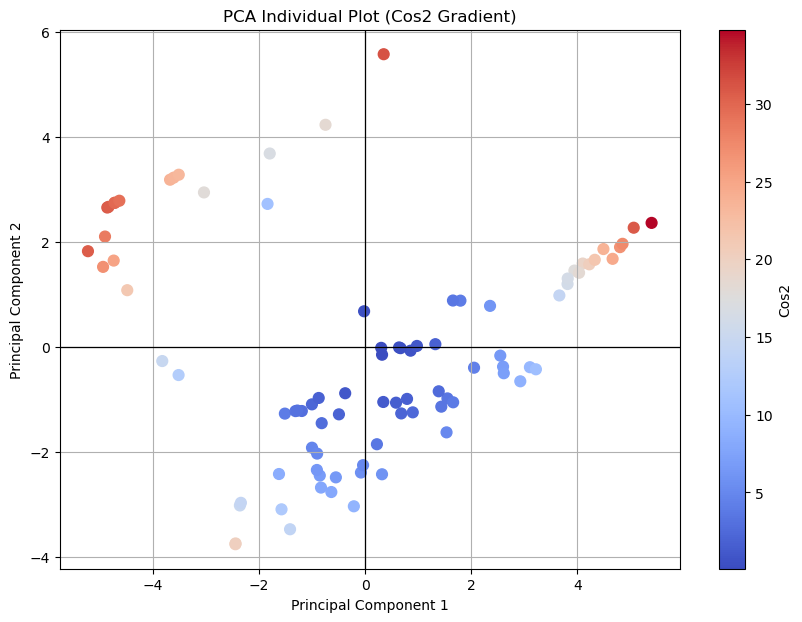

In [100]:
# Scatter plot with color gradient based on Cos2 values
plt.figure(figsize=(10, 7))
scatter = plt.scatter(x=pca_df['PC1'], y=pca_df['PC2'], c=pca_df['Cos2'], cmap='coolwarm', s=60)

# Add Cartesian axis lines at origin
plt.axhline(0, color='black', linewidth=0.9)  # Horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.9)  # Vertical line at x=0

# Add titles and labels
plt.title("PCA Individual Plot (Cos2 Gradient)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Cos2')
plt.grid(True)
plt.show()


Step 5.1: Plot the Variables to Show Contribution (Similar to fviz_pca_var)

To represent the contribution of each original feature to the components, you can visualize the variable loadings as vectors on the PCA plot.

C:\Users\iotra\AppData\Local\Temp\ipykernel_18560\4280633421.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings.PC1[i] * 1.1, loadings.PC2[i] * 1.1, feature, color='red', ha='center', va='center')


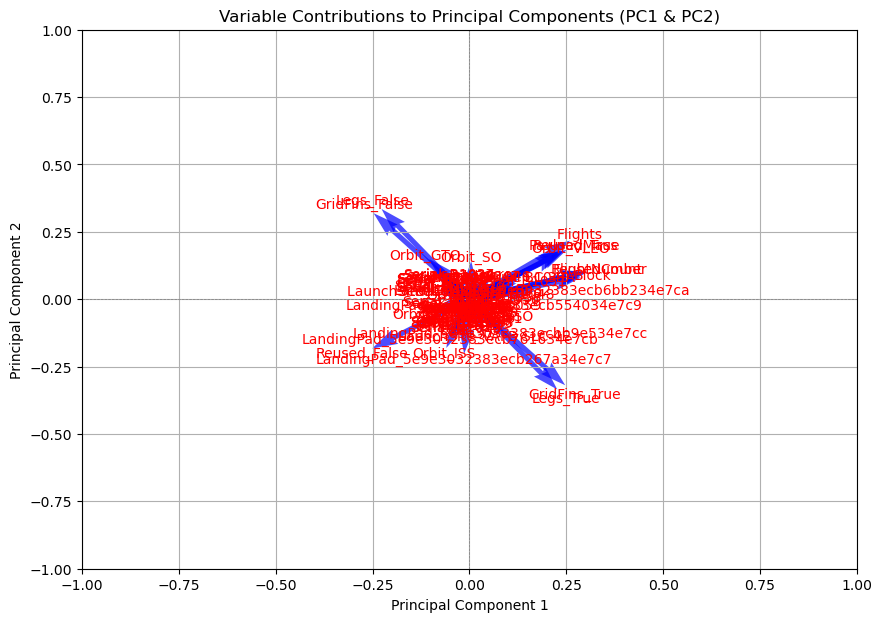

In [101]:
# Extract the loadings (contributions of each feature to PC1 and PC2)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)

# Set up the plot
plt.figure(figsize=(10, 7))

# Plot vectors representing each feature's contribution to the principal components
plt.quiver(
    np.zeros(loadings.shape[0]), np.zeros(loadings.shape[0]), 
    loadings['PC1'], loadings['PC2'], 
    angles='xy', scale_units='xy', scale=1, color="b", alpha=0.7
)

# Add labels to each vector for identification
for i, feature in enumerate(loadings.index):
    plt.text(loadings.PC1[i] * 1.1, loadings.PC2[i] * 1.1, feature, color='red', ha='center', va='center')

# Add grid, labels, and limits based on the data range for clarity
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Variable Contributions to Principal Components (PC1 & PC2)")
plt.grid()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


## Machine Learning (Continue here)

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [8]:
Y = data['Class'].to_numpy()

Y.shape

(90,)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [9]:
# students get this 
transform = preprocessing.StandardScaler()

In [10]:
X = transform.fit(X).transform(X)


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [12]:
X_test.shape

(18, 83)

In [13]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [14]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

#Diccionaty with the hyperparameters to be tested as lists

In [15]:
# Define model and parameter grid
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

# Initialize GridSearchCV with logistic regression, parameter grid, and 5-fold cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

#Fit the model on the training data
logreg_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [16]:
#Print the best parameters and best score

print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [17]:
# Predict on test data using the best model found by GridSearchCV
Y_hat_LR = logreg_cv.predict(X_test)

Y_hat_LR

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [18]:
Y_prob = logreg_cv.predict_proba(X_test)

Y_prob[:,1]

array([0.68424615, 0.83233858, 0.76335788, 0.82823129, 0.7462226 ,
       0.82202677, 0.80490265, 0.36615081, 0.81782717, 0.41562031,
       0.40100773, 0.65784075, 0.68151126, 0.83473897, 0.75256363,
       0.74571808, 0.65758173, 0.67391199])

In [19]:
#Now we apply the hyperparameters found to using GridSearchCV to the test data

from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression with the desired parameters
logreg = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs')

# Fit the model
logreg.fit(X_train, Y_train)

LogisticRegression(C=0.1)

## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


Regular logistic regression

In [47]:
# Calculate and print accuracy on the test data using the best model found by GridSearchCV

test_accuracyLR = logreg_cv.score(X_test, Y_test)

print("Test Set Accuracy:", test_accuracyLR)

Test Set Accuracy: 0.8333333333333334


Lets look at the confusion matrix:


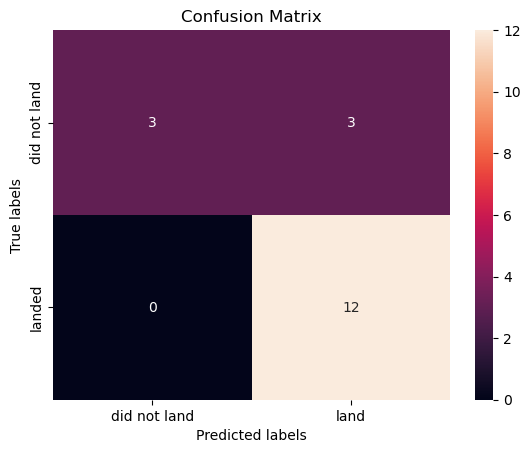

In [21]:
yhat=logreg.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [48]:
#Create paramethers and SVM object 

parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

# Initialize GridSearchCV (cross validation
# ) with SVM, parameter grid, and 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

#Fit the model on the training data 
svm_cv.fit(X_train, Y_train)



GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [49]:
#Print the best parameters and best score

print("tuned hpyerparameters :(best parameters) ", svm_cv.best_params_)
print("Test Set Accuracy:", svm_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Test Set Accuracy: 0.8482142857142856


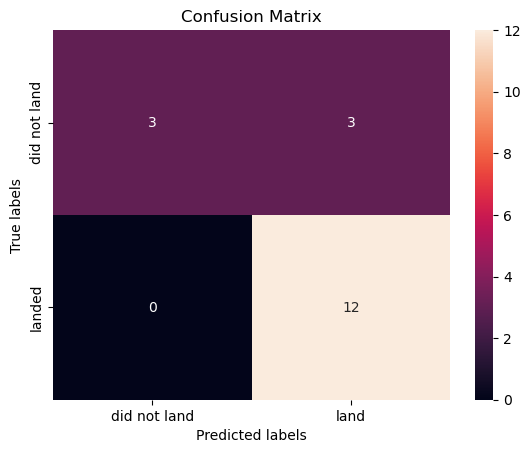

Test Set Accuracy: 0.8333333333333334


In [51]:
#Manually set the same paramether found by GridSearchCV and fit the model

svm = SVC(C=1.0, gamma=0.03162277660168379, kernel='sigmoid')

# Fit the model
svm.fit(X_train, Y_train)

# Predict the test set
Y_hat_SVM = svm_cv.predict(X_test)

plot_confusion_matrix(Y_test, Y_hat_SVM)

# Calculate the test set accuracy
test_accuracySVM =svm_cv.score(X_test, Y_test)
print("Test Set Accuracy:", test_accuracySVM)

## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [70]:
# Calculate the test set accuracy
test_accuracySVM =svm_cv.score(X_test, Y_test)
print("Test Set Accuracy:", test_accuracySVM)

Test Set Accuracy: 0.8333333333333334


We can plot the confusion matrix


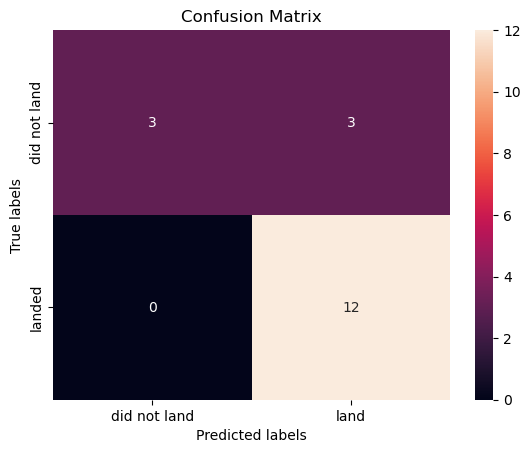

In [56]:
#Cross validation model

yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Decision Tree Classifier

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


Step-by-Step Grid Search with Cross-Validation

In [57]:
# 1 Define Your Model and Parameters:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# 2 Initialize GridSearchCV and ML Algorithm:
tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv=10)

# 3Fit GridSearchCV to the Training Data:
tree_cv.fit(X_train, Y_train)



GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [58]:
#4 Print the best parameters and the best score:

print("Best Parameters:", tree_cv.best_params_)
print("Best Cross-Validation Score:", tree_cv.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Cross-Validation Score: 0.875


In [59]:
#5 Create final model and fit with best parameters found:

treeF = DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt', min_samples_leaf=1, min_samples_split=10, splitter='best')

treeF.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                       min_samples_split=10)

In [76]:
# Created final prediction: 

yhat_tree = tree_cv.predict(X_test)

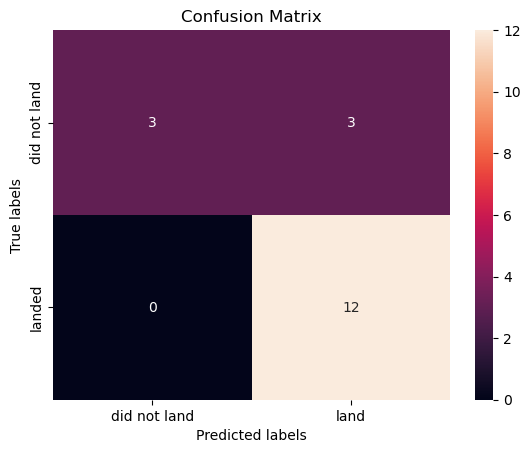

In [77]:
#6 Evaluate the Model on Test Data: 

plot_confusion_matrix(Y_test,yhat_tree)


In [87]:
# Assuming predictions and true labels for one of your models (e.g., logistic regression)
yhat_tree = tree_cv.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, yhat_tree)

# Extract TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# TP, TN, FP, FN
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

True Positives (TP): 12
True Negatives (TN): 3
False Positives (FP): 3
False Negatives (FN): 0


In [88]:
# Print the classification report that includes precision, recall, and F1-score
print("Classification Report for Desicion Trees:")
print(classification_report(Y_test, yhat_tree))


Classification Report for Desicion Trees:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [62]:
# Calculate the test set accuracy

test_accuracyT =treeF.score(X_test, Y_test)

print("Test Set Accuracy:", test_accuracyT)

Test Set Accuracy: 0.8333333333333334


We can plot the confusion matrix


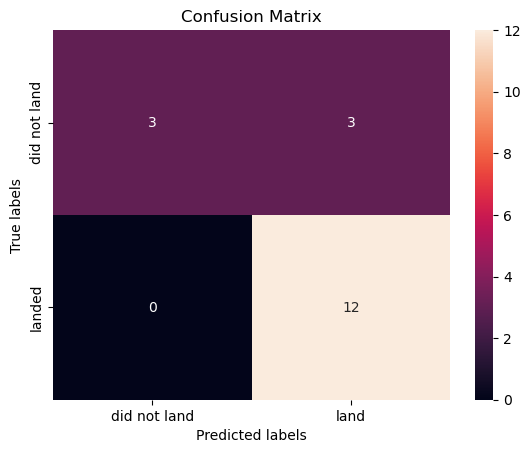

In [63]:
plot_confusion_matrix(Y_test,yhat_tree)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [64]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

KNN_cv = GridSearchCV(KNN, parameters, cv=10).fit(X_train, Y_train)

KNN_cv

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [65]:
print("tuned hpyerparameters :(best parameters) ",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [66]:
test_accuracyK =KNN_cv.score(X_test, Y_test)
print("Test Set Accuracy:", test_accuracyK)

Test Set Accuracy: 0.8333333333333334


We can plot the confusion matrix


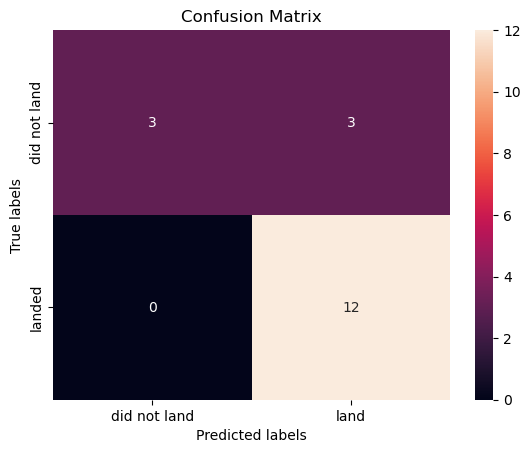

In [67]:
yhat = KNN_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


After reviewing the best method is the Desicion Tress Classifier with accuracy of 94.4%

Using the Y_hat prediction output:

C:\Users\iotra\AppData\Local\Temp\ipykernel_8844\990424686.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Model')


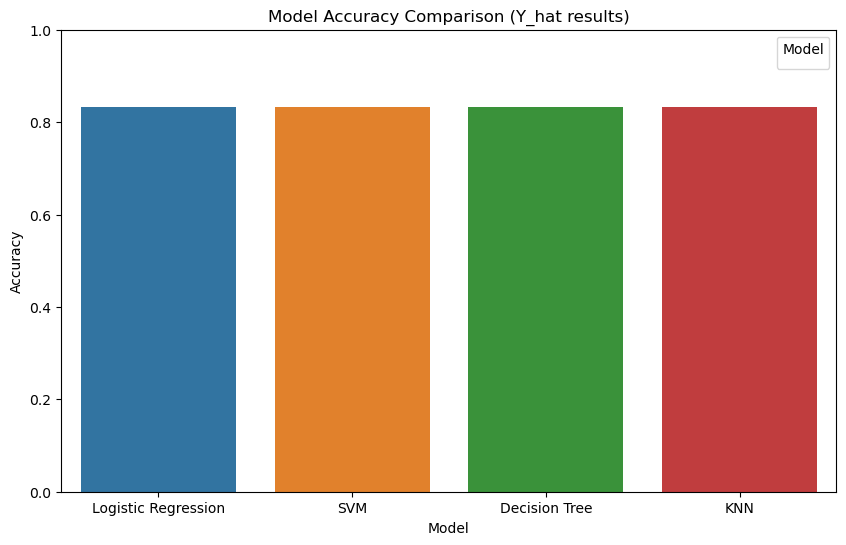

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Accuracy results from different models
accuracy_results = {
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'Accuracy': [test_accuracyLR, test_accuracySVMCV, test_accuracyT, test_accuracyK]
}

# Create a DataFrame
df_accuracy = pd.DataFrame(accuracy_results)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_accuracy, hue='Model', dodge=False)
plt.title('Model Accuracy Comparison (Y_hat results)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.legend(title='Model')
plt.show()


F1 Score for all models

In [79]:
from sklearn.metrics import f1_score

# Assuming predictions and true labels for one of your models (e.g., logistic regression)
y_pred = logreg_cv.predict(X_test)

# Calculate F1 score
f1 = f1_score(Y_test, y_pred)

# Print F1 score
print("F1 Score for Logistic Regression:", f1)

# Repeat for other models
y_pred_svm = svm_cv.predict(X_test)
f1_svm = f1_score(Y_test, y_pred_svm)
print("F1 Score for SVM:", f1_svm)

y_pred_tree = treeF.predict(X_test)
f1_tree = f1_score(Y_test, y_pred_tree)
print("F1 Score for Decision Tree:", f1_tree)

y_pred_knn = KNN_cv.predict(X_test)
f1_knn = f1_score(Y_test, y_pred_knn)
print("F1 Score for KNN:", f1_knn)


F1 Score for Logistic Regression: 0.8888888888888888
F1 Score for SVM: 0.8888888888888888
F1 Score for Decision Tree: 0.8888888888888888
F1 Score for KNN: 0.8888888888888888


Theoretical accuracy out of Grid Search, model.best_score_

C:\Users\iotra\AppData\Local\Temp\ipykernel_8844\235551179.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Model')


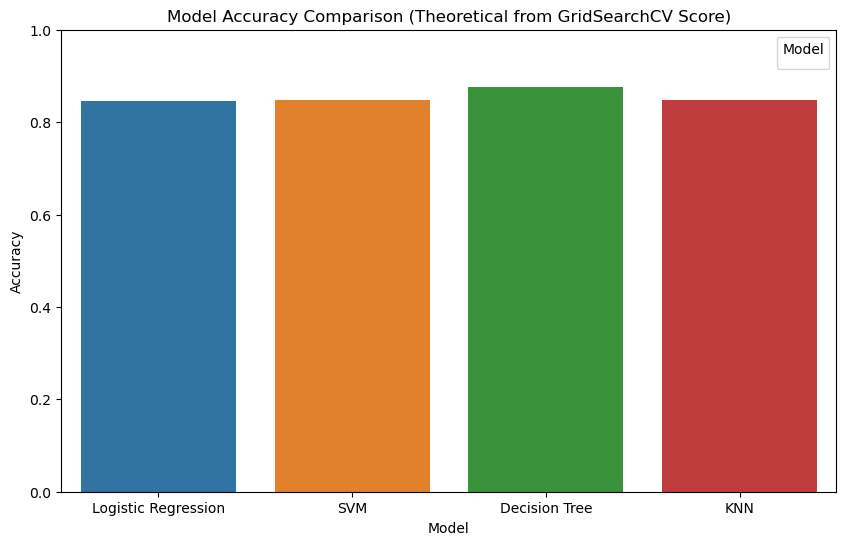

In [75]:
# Accuracy results from different models
accuracy_results = {
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'Score': [logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, KNN_cv.best_score_]
}

# Create a DataFrame
df_accuracy = pd.DataFrame(accuracy_results)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', data=df_accuracy, hue='Model', dodge=False)
plt.title('Model Accuracy Comparison (Theoretical from GridSearchCV Score)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.legend(title='Model')
plt.show()

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>


PCA test (please disregard)

,sepal_length,sepal_width,petal_length,petal_width,species,PC1,PC2,PC3,PC4
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-0.027915,0.002262
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-0.210464,0.099027
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0.017900,0.019968
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0.031559,-0.075576
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0.090079,-0.061259


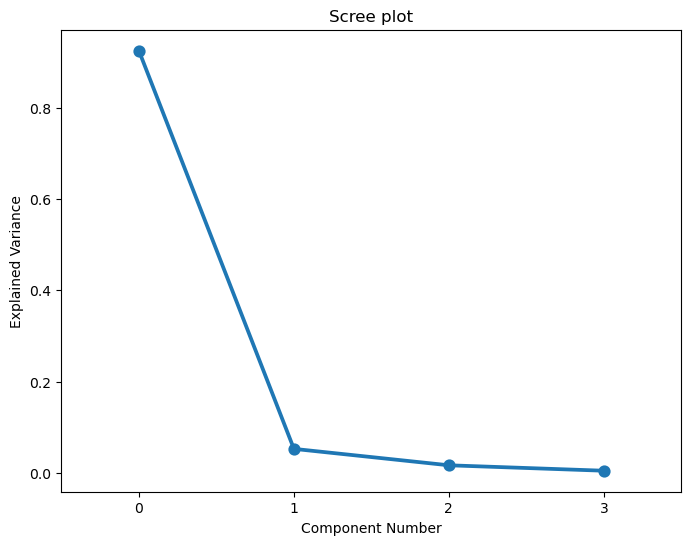

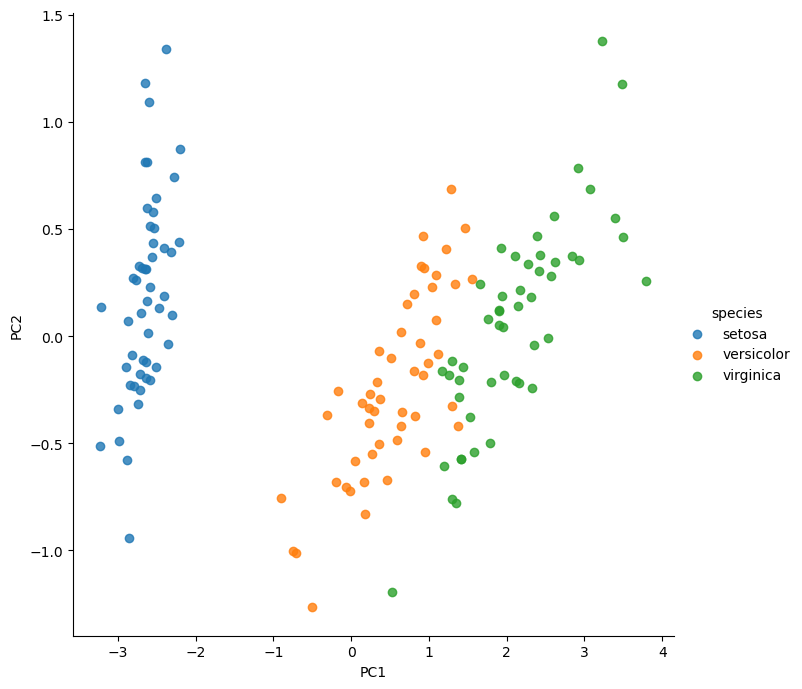

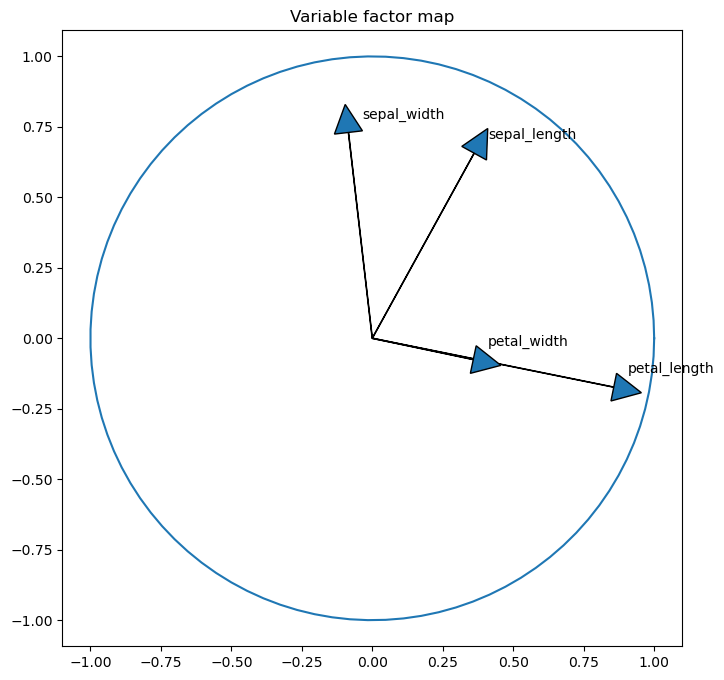

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
 
df = sns.load_dataset('iris')
 
n_components = 4
 
# Do the PCA.
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(df[['sepal_length', 'sepal_width',
                                'petal_length', 'petal_width']])

# Append the principle components for each entry to the dataframe
for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]

display(df.head())

# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

# Show the points in terms of the first two PCs
g = sns.lmplot(x='PC1',
               y='PC2',
               hue='species',
               data=df,
               fit_reg=False,
               scatter=True,
               height=7)

plt.show()

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()